In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [2]:
# Load the data
train_data = pd.read_csv('/Users/yeshwanthsatyadev/Downloads/SalaryData_Train.csv')
test_data = pd.read_csv('/Users/yeshwanthsatyadev/Downloads/SalaryData_Test.csv')

In [3]:
# Combine train and test data for exploration (if needed)
combined_data = pd.concat([train_data, test_data], axis=0)

# Exploratory Data Analysis (EDA)
# Display summary statistics, check for missing values, etc.
print(combined_data.info())
print(combined_data.describe())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB
None
                age   educationno   capitalgain   capitalloss  hoursperweek
count  45221.000000  45221.000000  45221.000000  45221.000000  45221.000

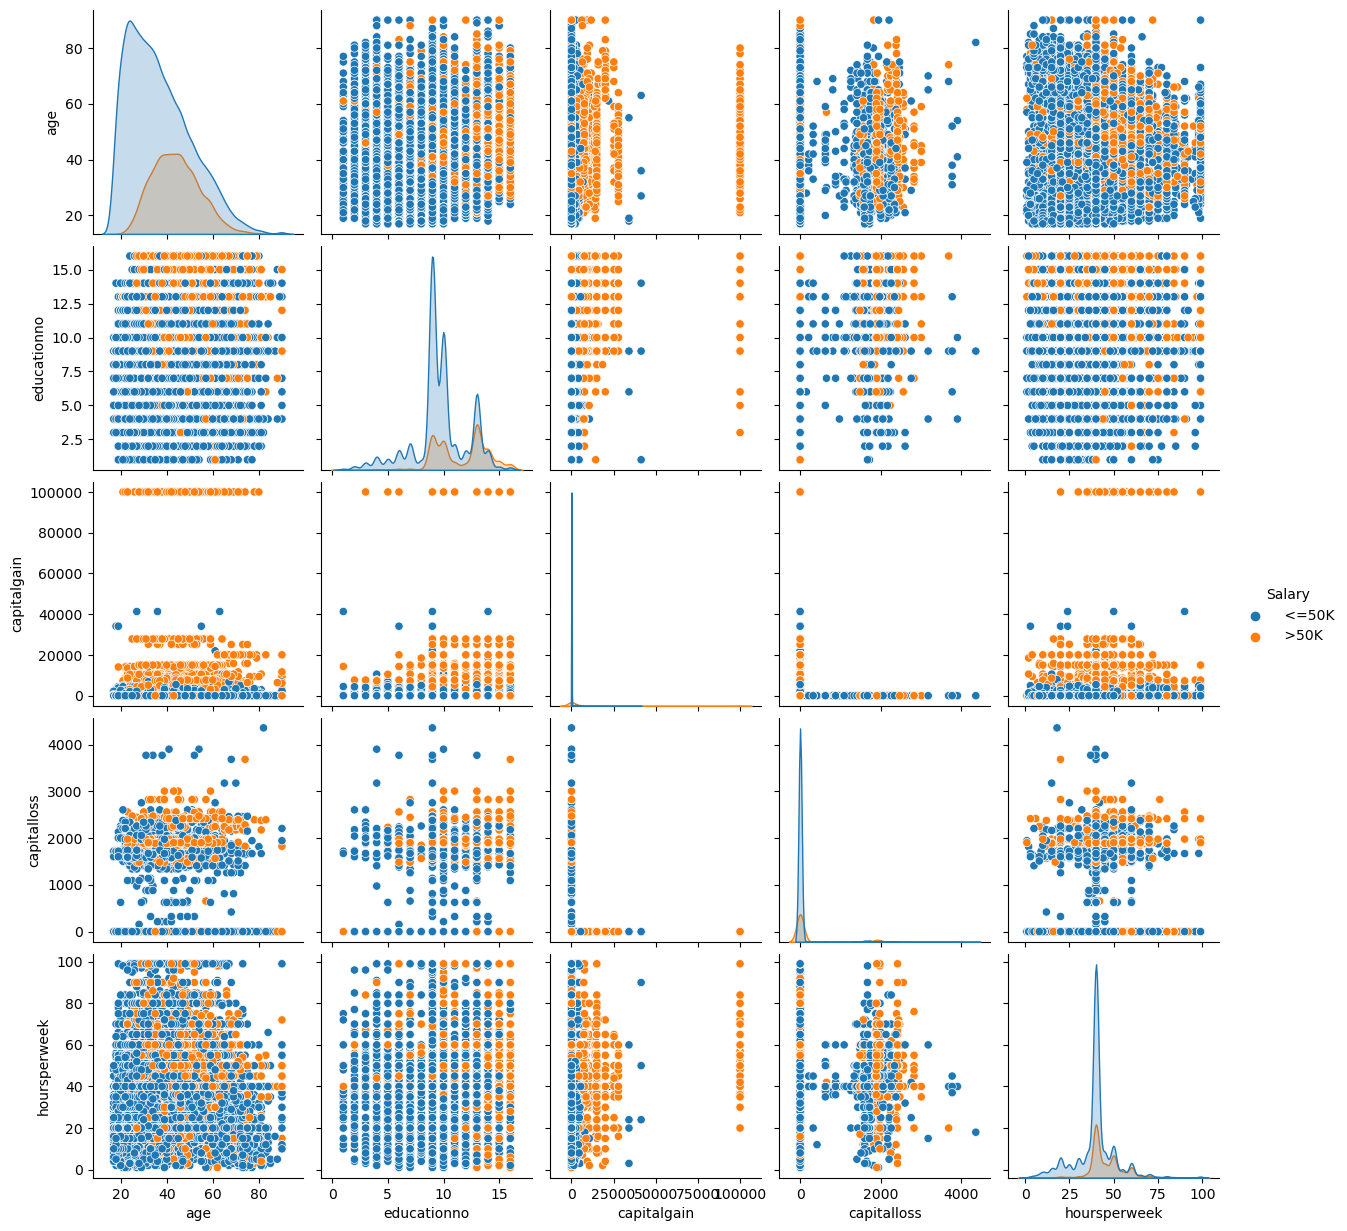

In [4]:
# Visualizations
# For example, a pair plot for numerical variables
sns.pairplot(combined_data, hue='Salary')
plt.show()

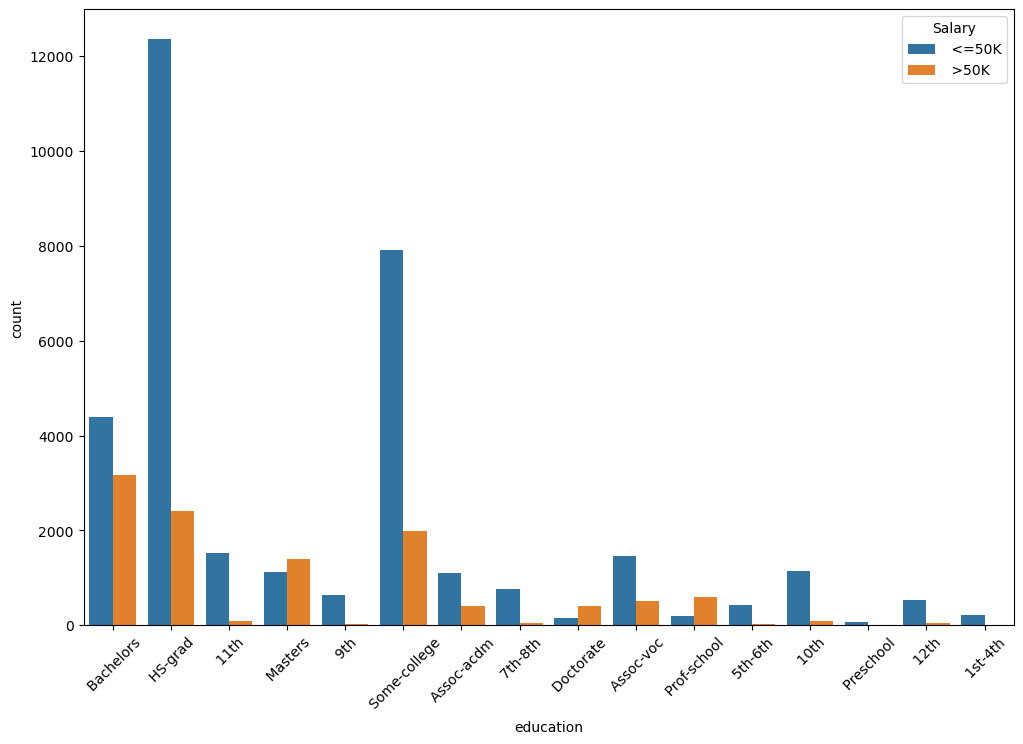

In [5]:
# Count plot for categorical variables
plt.figure(figsize=(12, 8))
sns.countplot(x='education', hue='Salary', data=combined_data)
plt.xticks(rotation=45)
plt.show()


In [6]:
# Data Preprocessing
# Encode categorical variables
label_encoder = LabelEncoder()
for col in combined_data.select_dtypes(include='object').columns:
    combined_data[col] = label_encoder.fit_transform(combined_data[col])

In [7]:
# Split the data into features (X) and target variable (y)
X = combined_data.drop('Salary', axis=1)
y = combined_data['Salary']


In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Model Training
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [10]:
# Model Evaluation
y_pred = naive_bayes_model.predict(X_test)

In [11]:
# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7959093421779989
Confusion Matrix:
 [[6466  340]
 [1506  733]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.88      6806
           1       0.68      0.33      0.44      2239

    accuracy                           0.80      9045
   macro avg       0.75      0.64      0.66      9045
weighted avg       0.78      0.80      0.77      9045

